In [4]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

### Word2Vec Model

In [5]:
glove_file = datapath('/Users/ling/Desktop/CS224/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [6]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [39]:
keywords = [
"how to lose weight",
"gym",
"fitness",
"bodybuilding",
"pilates",
"exercise",
"health",
"weight loss",
"workout",
"diet",
"nutrition",
"personal trainer",
"aerobic",
"mens health",
"lose weight",
"athletic club",
"health tips"
]

In [40]:
import pandas as pd
extended_keywords = []
for keyword in keywords:
    extended_keywords.append(keyword)
    try:
        tmp = pd.DataFrame(model.most_similar(keyword))
        for i in tmp[0]:
            extended_keywords.append(i)
#         extended_keywords.append(model.most_similar(keyword[1]))
    except:
        print(keyword + "...not in vocabulary")

how to lose weight...not in vocabulary
weight loss...not in vocabulary
personal trainer...not in vocabulary
mens health...not in vocabulary
lose weight...not in vocabulary
athletic club...not in vocabulary
health tips...not in vocabulary


In [42]:
len(extended_keywords)

117

In [43]:
extended_keywords

['how to lose weight',
 'gym',
 'gyms',
 'gymnasium',
 'workout',
 'room',
 'cafeteria',
 'playground',
 'locker',
 'canteen',
 'dorm',
 'fitness',
 'fitness',
 'workout',
 'physical',
 'wellness',
 'mental',
 'gym',
 'aerobics',
 'skills',
 'training',
 'testing',
 'stamina',
 'bodybuilding',
 'motocross',
 'powerlifting',
 'wrestling',
 'weightlifting',
 'bodybuilder',
 'judo',
 'boxing',
 'taekwondo',
 'bodybuilders',
 'kickboxing',
 'pilates',
 'yoga',
 'aerobics',
 'hatha',
 'kriya',
 'cardio',
 'zumba',
 'ashtanga',
 'meditation',
 'gym',
 'patanjali',
 'exercise',
 'exercises',
 'routine',
 'training',
 'practice',
 'preparation',
 'necessary',
 'activities',
 'exercising',
 'regimen',
 'take',
 'health',
 'care',
 'medical',
 'healthcare',
 'education',
 'welfare',
 'environmental',
 'nutrition',
 'aids',
 'prevention',
 'hospitals',
 'weight loss',
 'workout',
 'workouts',
 'regimen',
 'gym',
 'fitness',
 'pregame',
 'shootaround',
 'aerobics',
 'treadmill',
 'offseason',
 'ro

In [4]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [5]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [9]:
model.most_similar('tumblr')

[('instagram', 0.8230136036872864),
 ('livejournal', 0.7461103200912476),
 ('pinterest', 0.7256048917770386),
 ('twitter', 0.7218025922775269),
 ('myspace', 0.7040384411811829),
 ('soundcloud', 0.7028563022613525),
 ('vimeo', 0.6964771747589111),
 ('purevolume', 0.6807675361633301),
 ('flickr', 0.6802016496658325),
 ('linkedin', 0.6753968596458435)]

In [10]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [11]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result
#     return result[0][0]

In [12]:
analogy('japan', 'japanese', 'australia')

[('australian', 0.8923498392105103),
 ('zealand', 0.8012940883636475),
 ('british', 0.7840811014175415),
 ('australians', 0.6766529083251953),
 ('indian', 0.670796811580658),
 ('canadian', 0.660130500793457),
 ('english', 0.6396120190620422),
 ('england', 0.6350405216217041),
 ('sydney', 0.6257352232933044),
 ('britain', 0.6175569295883179)]

In [13]:
analogy('australia', 'beer', 'france')

[('champagne', 0.6480064392089844),
 ('wine', 0.6029773354530334),
 ('cognac', 0.599911093711853),
 ('drink', 0.596866250038147),
 ('perfume', 0.5843737125396729),
 ('drinks', 0.5787433981895447),
 ('vodka', 0.5771392583847046),
 ('beers', 0.5634331107139587),
 ('anheuser', 0.5613827705383301),
 ('bourbon', 0.552852988243103)]

In [14]:
analogy('obama', 'clinton', 'reagan')

[('nixon', 0.7844685912132263),
 ('ronald', 0.7311492562294006),
 ('eisenhower', 0.7001146674156189),
 ('kennedy', 0.6773301362991333),
 ('roosevelt', 0.6699341535568237),
 ('h.w.', 0.6697346568107605),
 ('truman', 0.6546196937561035),
 ('kissinger', 0.6443866491317749),
 ('administrations', 0.6249614953994751),
 ('watergate', 0.6158170700073242)]

In [15]:
analogy('tall', 'tallest', 'long')

[('longest', 0.7037105560302734),
 ('the', 0.6229448914527893),
 ('major', 0.6216300129890442),
 ('time', 0.6173369884490967),
 ('first', 0.616451621055603),
 ('since', 0.60569828748703),
 ('decade', 0.6019696593284607),
 ('busiest', 0.600587785243988),
 ('its', 0.6004384756088257),
 ('part', 0.6002342700958252)]

In [16]:
analogy('good', 'fantastic', 'bad')

[('terrible', 0.7074226140975952),
 ('awful', 0.70609450340271),
 ('horrible', 0.6906466484069824),
 ('scary', 0.680291473865509),
 ('weird', 0.6775556206703186),
 ('crazy', 0.6615543365478516),
 ('strange', 0.6522735953330994),
 ('dreadful', 0.6404813528060913),
 ('bizarre', 0.6389496922492981),
 ('incredible', 0.6321425437927246)]

In [17]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/Users/ling/miniconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:730: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [17]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

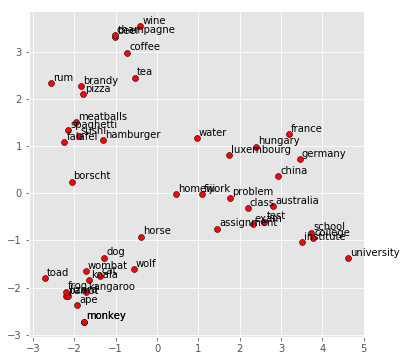

In [24]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

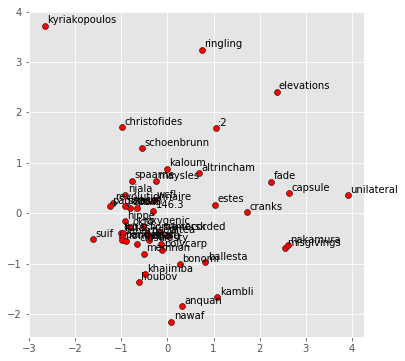

In [27]:
display_pca_scatterplot(model, sample=50)